## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("mcdonalds.csv")

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.shape

(1453, 15)

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [10]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [11]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [12]:
# Select columns for PCA
MD_x = data.iloc[:, 0:11]

In [13]:
# Convert "Yes" and "No" to binary
MD_x = (MD_x == "Yes").astype(int)

In [14]:
np.round(MD_x.mean(), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [15]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing

MD_pca = preprocessing.scale(MD_x)

In [17]:
# Perform PCA
MD_pca = PCA(n_components=11)
pc = MD_pca.fit_transform(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [18]:
# Summary of PCA
print("Standard deviation:")
print(np.round(MD_pca.explained_variance_, 4))
print("Proportion of Variance:")
print(np.round(MD_pca.explained_variance_ratio_, 4))
print("Cumulative Proportion:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4))

Standard deviation:
[0.5731 0.369  0.2546 0.159  0.1138 0.0963 0.0839 0.0757 0.0704 0.0619
 0.0561]
Proportion of Variance:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Proportion:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [19]:
print(pd.DataFrame(MD_pca.components_, columns=MD_x.columns))

       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensive   healthy  disgusting  
0  

In [20]:
pca_comp = MD_pca.components_
num_pca_feat = MD_pca.n_features_
pca_list = ["PC"+str(i) for i in list(range(1, num_pca_feat+1))]
pca_comp_df = pd.DataFrame.from_dict(dict(zip(pca_list, pca_comp)))
pca_comp_df['variable'] = MD_x.columns.values
pca_comp_df = pca_comp_df.set_index('variable')
pca_comp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


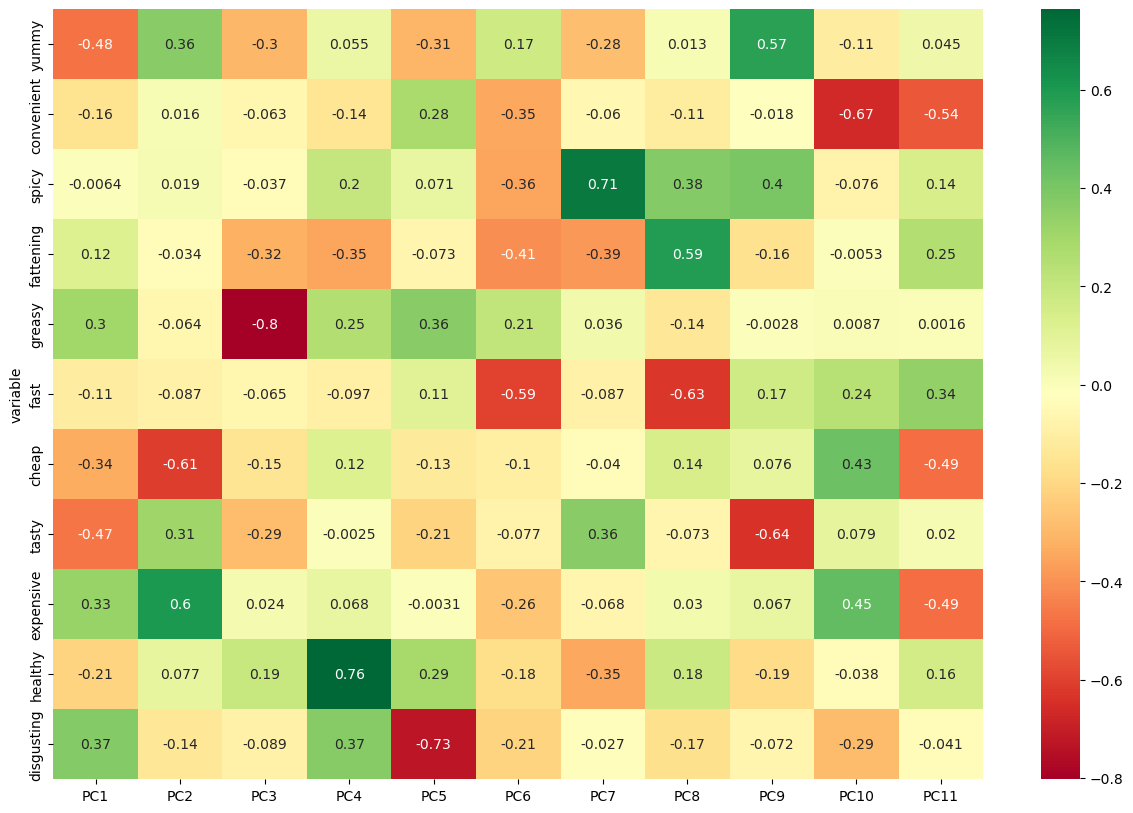

In [21]:

plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(pca_comp_df, annot=True, cmap='RdYlGn')
plt.show()

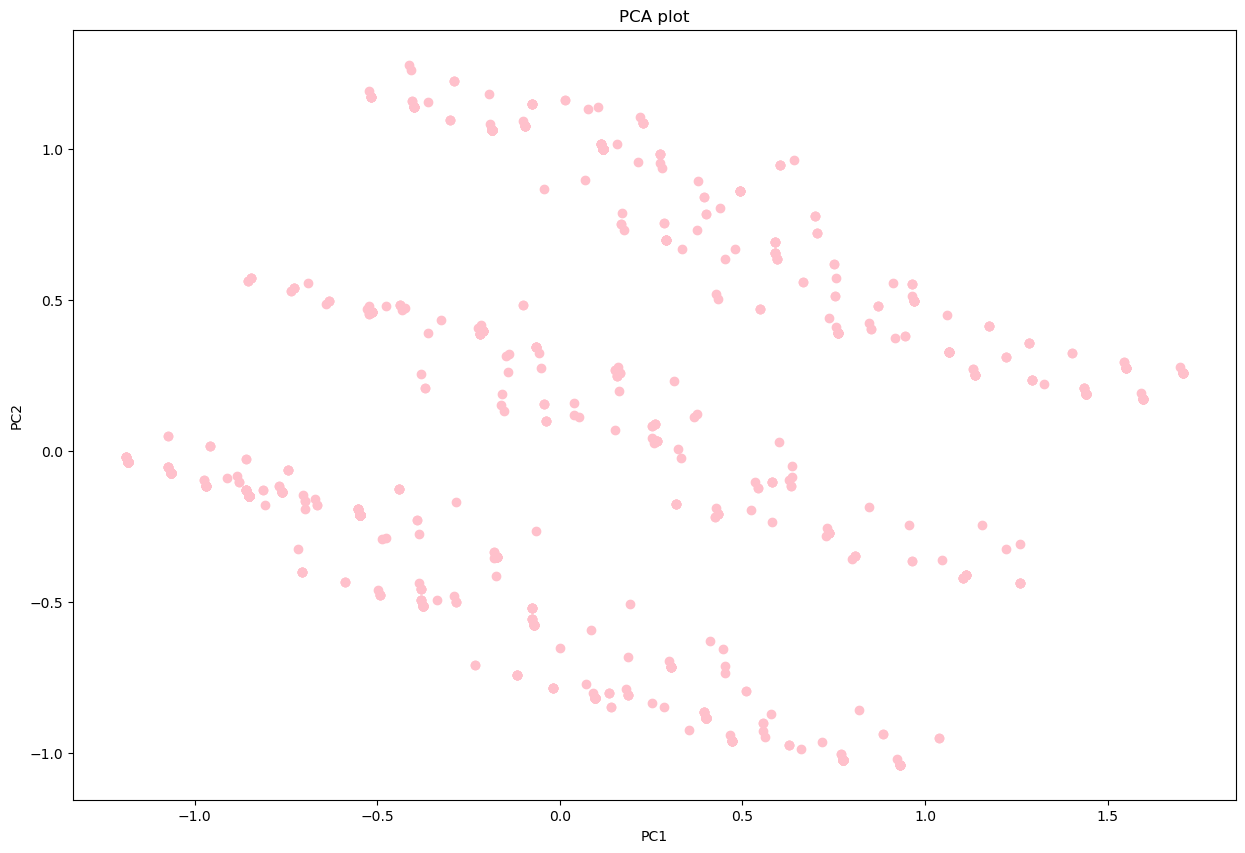

In [22]:
# Plot PCA
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='pink')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

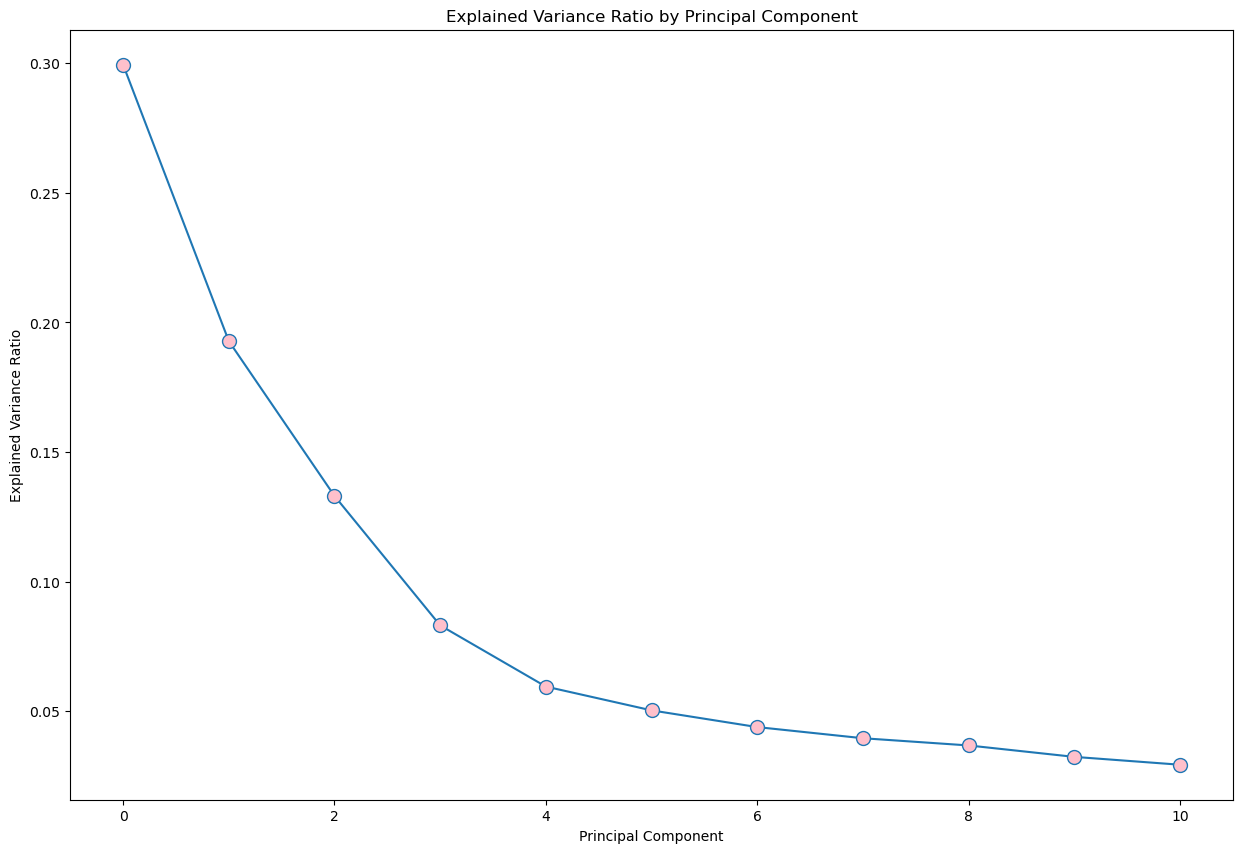

In [23]:
plt.figure()
plt.plot(MD_pca.explained_variance_ratio_, marker='o', linestyle='-',markerfacecolor='pink',markersize=10)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [24]:
from sklearn.cluster import KMeans
optimal_k=4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0).fit(MD_x)
data['cluster_num'] = kmeans.labels_
print (kmeans.labels_)
print (kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [25]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

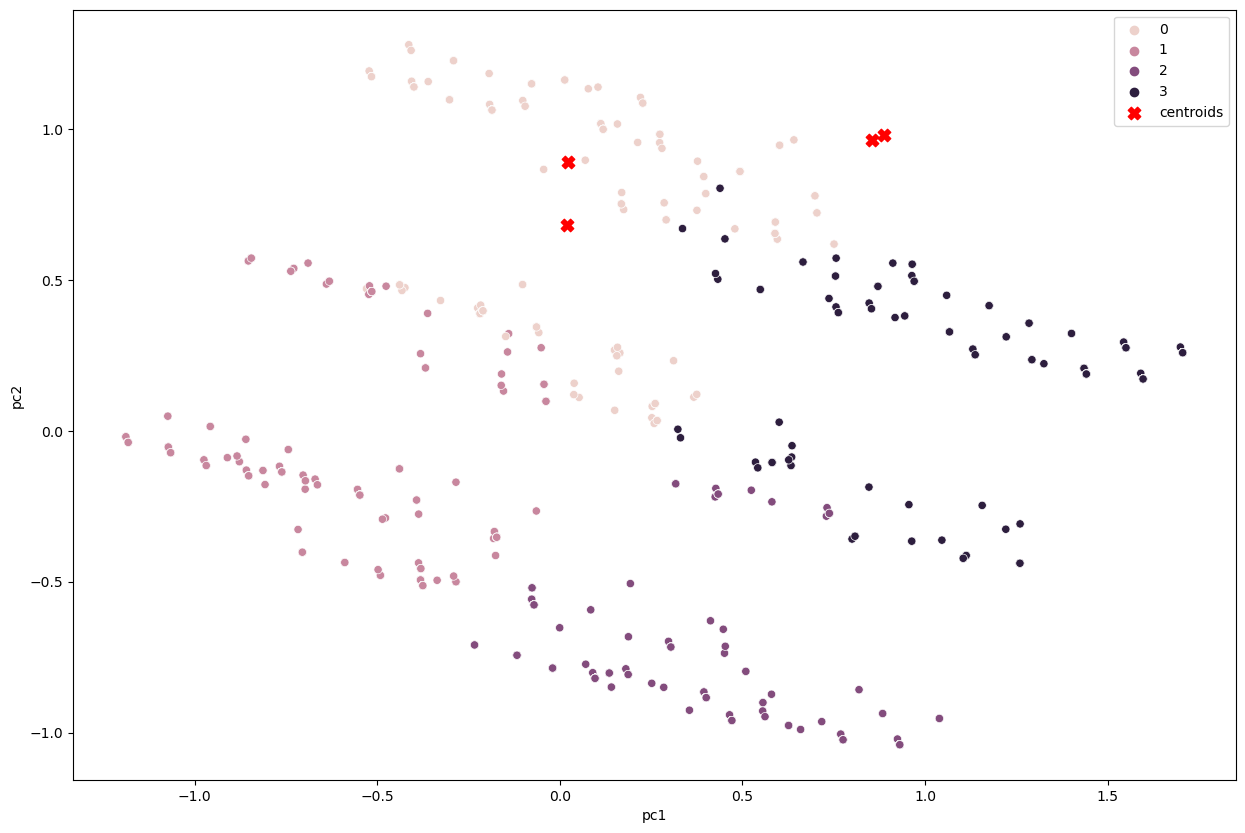

In [26]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
n_clusters = range(2, 9)
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    # Relabel segments to ensure consistency
    labels = kmeans.labels_
    segment_solutions_k=[]
    for i in range(10):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(MD_x)
        km_rep_labels = km_rep.labels_
        segment_solutions_k.append(adjusted_rand_score(labels, km_rep_labels))
    segment_solutions_k.append(segment_solutions_k)

In [28]:
# plot the adjusted Rand index scores for each number of clusters
#plt.errorbar(n_clusters, np.mean(segment_solutions, axis=1), yerr=np.std(segment_solutions, axis=1), fmt="o-")
#plt.xlabel("number of clusters")
#plt.ylabel("adjusted Rand index")
#plt.show()

In [29]:
# Compute silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples
segment_solutions = []
silhouette_scores = []
silhouette_avg = silhouette_score(MD_x, km_rep_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.26


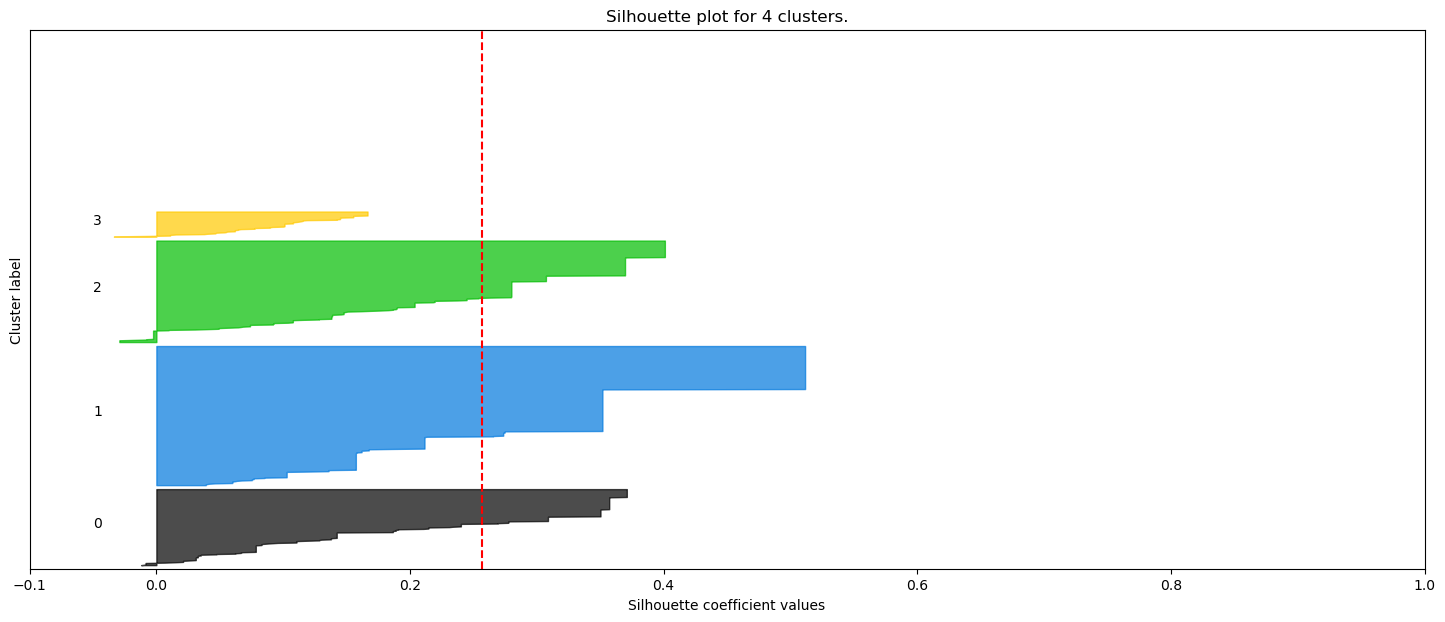

In [30]:

# Compute silhouette samples
sample_silhouette_values = silhouette_samples(MD_x, km_rep_labels)

# Plot silhouette plot for each cluster
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(MD_x) + (optimal_k + 1) * 10])

y_lower = 10
for i in range(optimal_k):
  ith_cluster_silhouette_values = sample_silhouette_values[ km_rep_labels == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = plt.cm.nipy_spectral(float(i) / optimal_k)
  ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

  # Label silhouette plots with their cluster numbers at the middle
  ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute new y_lower for the next plot
  y_lower = y_upper + 10

ax.set_title("Silhouette plot for {} clusters.".format(optimal_k))
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

